In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
# print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.datasets.samples_generator import make_classification
from mpl_toolkits.mplot3d import Axes3D  # 导入三维坐标

In [2]:
X,y = make_classification(n_samples=1000, n_classes=3, n_features=3, n_informative=2,
                    n_redundant=0, n_clusters_per_class=1, class_sep=0.5, random_state=42)

 **n_features** : int, optional (default=20)

The total number of features. These comprise 
1. **n_informative**提供有效信息的 
2. **n_redundant( features are generated as random linear combinations of the informative features.)** 
3. **n_repeated(drawn randomly from the informative and the redundant features.)** 
4. **n_features-n_informative-n_redundant-n_repeated** useless features drawn at random.

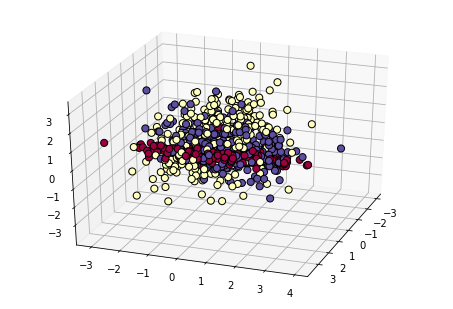

In [3]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o',c=y, cmap=plt.cm.Spectral, s=50, depthshade=False, edgecolors='black')
plt.show()

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [6]:
print(X.shape)
print(X_pca.shape)

(1000, 3)
(1000, 2)


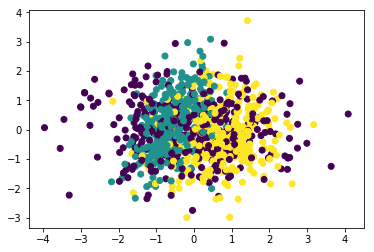

In [7]:
plt.scatter(X_pca[:,0], X_pca[:,1],c=y)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_lda = lda.transform(X)

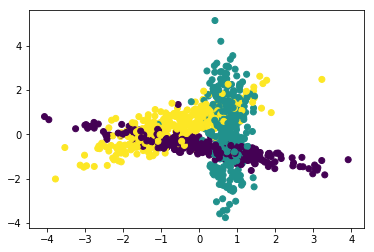

In [10]:
plt.scatter(X_lda[:,0], X_lda[:,1],c=y)

In [11]:
import gzip
import pickle

In [12]:
with gzip.open('../input/mnist.pkl.gz') as f:
    train_data, valid_data, test_data = pickle.load(f, encoding='bytes')

In [13]:
print(train_data[0].shape)
print(valid_data[0].shape)
print(test_data[0].shape)

(50000, 784)
(10000, 784)
(10000, 784)


In [14]:
data = train_data[0]
label = train_data[1]

In [15]:
digit0 = data[0,0:].reshape(-1,28)
label[0]

5

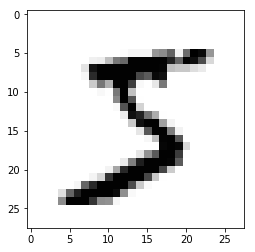

In [16]:
plt.imshow(digit0, cmap='Greys')

In [29]:
pca = PCA(n_components=0.99) #选择保留的方差比例
pca.fit(data)
print('保留99%的方差， PCA降维后的维度: ', pca.n_components_)

digit_pca = pca.transform(data)
test_digit_pca = pca.transform(test_data[0])

保留99%的方差， PCA降维后的维度:  331


In [28]:
digit_pca.shape

(50000, 331)

In [18]:
# plt.imshow(digit_pca[0,0:].reshape(-1,28))

ValueError: cannot reshape array of size 331 into shape (28)

In [19]:
digit_inv_pca = pca.inverse_transform(digit_pca)

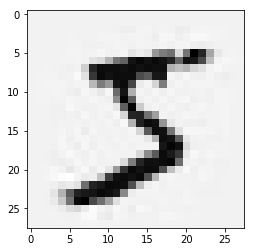

In [20]:
plt.imshow(digit_inv_pca[0,0:].reshape(-1,28), cmap='Greys')

In [21]:
%%time
svc = SVC(kernel='rbf')
svc.fit(data,label)
y_pred = svc.predict(test_data[0])

CPU times: user 19min 55s, sys: 1.26 s, total: 19min 56s
Wall time: 19min 56s


In [24]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
print('降维后的准确度为：',np.mean(y_pred == test_data[1]))

降维后的准确度为： 0.9435


In [30]:
%%time
svc = SVC(kernel='rbf')
svc.fit(digit_pca,label)
y_pred = svc.predict(test_digit_pca)

CPU times: user 7min 36s, sys: 292 ms, total: 7min 36s
Wall time: 7min 36s


In [31]:
print('降维后的准确度为：',np.mean(y_pred == test_data[1]))

降维后的准确度为： 0.9555
